<a href="https://colab.research.google.com/github/nodonut6311/Otsu-s-Thresholding-in-Image-Processing/blob/main/Otsu's.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get update
!apt-get install -y tesseract-ocr
!pip install pytesseract opencv-python

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:2 https://cli.github.com/packages stable InRelease
Get:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,539 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,849 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [3,623 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [6,410 kB]
Get:14 http://archive.ubu

In [ ]:
import cv2
import pytesseract
import matplotlib.pyplot as plt

In [ ]:
pytesseract.pytesseract.tesseract_cmd = "/usr/bin/tesseract"

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test2.png to test2.png


(np.float64(-0.5), np.float64(533.5), np.float64(611.5), np.float64(-0.5))

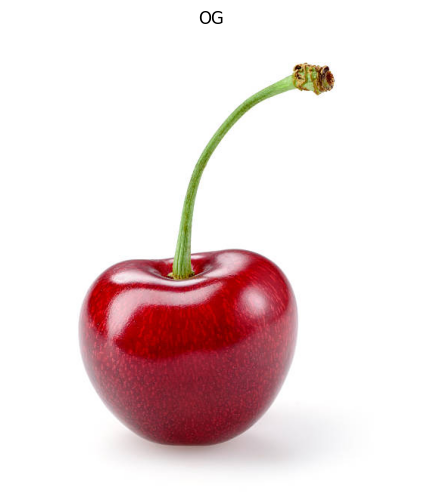

In [ ]:
img = cv2.imread("test2.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (6,6))
plt.imshow(img_rgb)
plt.title("OG")
plt.axis("off")

(np.float64(-0.5), np.float64(533.5), np.float64(611.5), np.float64(-0.5))

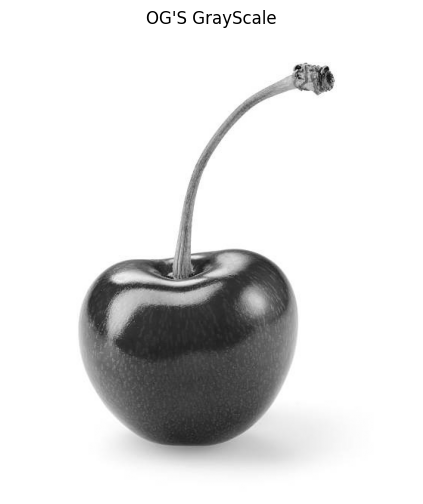

In [ ]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

plt.figure(figsize = (6,6))
plt.imshow(gray, cmap = "gray")
plt.title("OG'S GrayScale")
plt.axis("off")

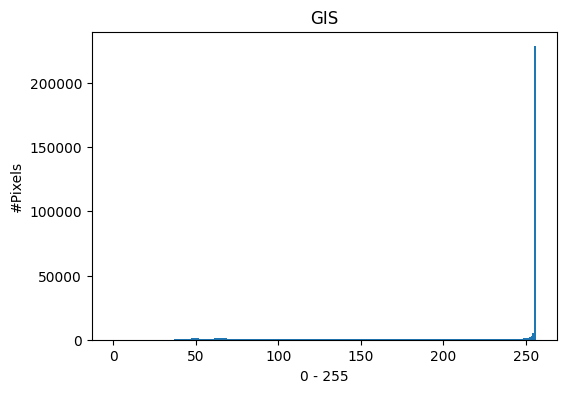

In [ ]:
#Grayscale Intensity Histogram :
plt.figure(figsize=(6,4))
plt.hist(gray.ravel(), bins=256, range=[0,256]) #converting 2D to 1D
plt.title("GIS")
plt.xlabel("0 - 255")
plt.ylabel("#Pixels")
plt.show()

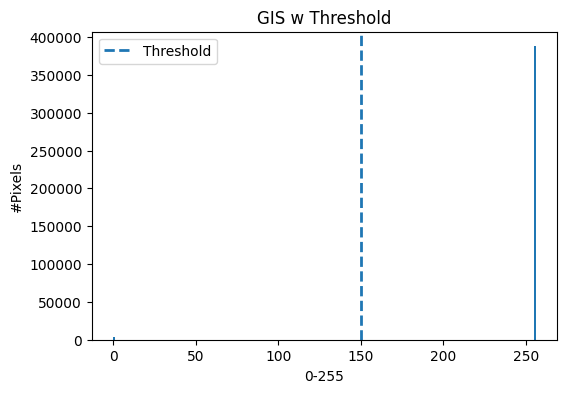

In [ ]:
threshold_value = 150

plt.figure(figsize=(6,4))
plt.hist(gray.ravel(), bins=256, range=[0,256])
plt.axvline(threshold_value, linestyle="--", linewidth=2, label="Threshold")
plt.title("GIS w Threshold")
plt.xlabel("0-255")
plt.ylabel("#Pixels")
plt.legend()
plt.show()

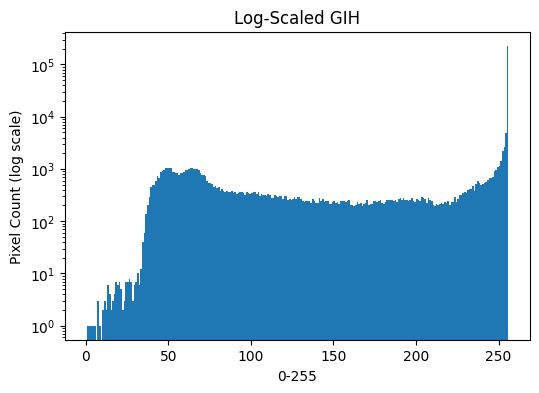

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(gray.ravel(), bins=256, range=[0,256])
plt.yscale("log")
plt.title("Log-Scaled GIH")
plt.xlabel("0-255")
plt.ylabel("Pixel Count (log scale)")
plt.show()

In [ ]:
otsu_threshold, thresh_otsu = cv2.threshold(
    gray,
    0,                      # Otsu basic
    255,
    cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

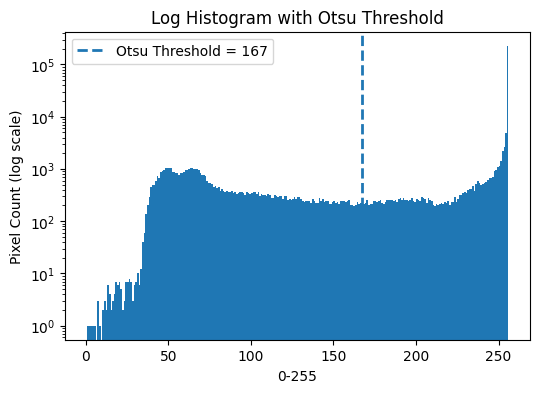

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(gray.ravel(), bins=256, range=[0,256])
plt.yscale("log")
plt.axvline(
    otsu_threshold,
    linestyle="--",
    linewidth=2,
    label=f"Otsu Threshold = {otsu_threshold:.0f}"
)
plt.title("Log Histogram with Otsu Threshold")
plt.xlabel("0-255")
plt.ylabel("#Pixel(log scale)")
plt.legend()
plt.show()


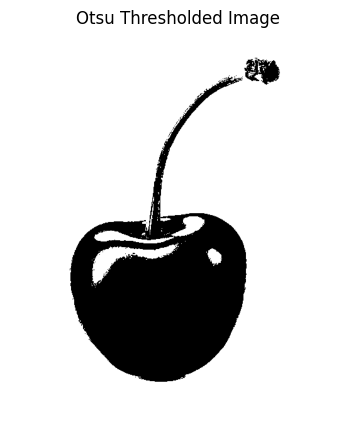

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(thresh_otsu, cmap="gray")
plt.title("Otsu Thresholded Image")
plt.axis("off")
plt.show()